In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from word2number import w2n

In [72]:
df=pd.read_csv("Salary_Prediction.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [12]:
import math
median_test_score=math.floor(df['test_score(out of 10)'].median())
median_test_score

8

In [58]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(median_test_score)

In [19]:
df.at[1,'experience']='one'
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,one,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [59]:
df.experience=df.experience.fillna("zero")

df.experience

0     0
1     1
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [60]:
df['experience']=df['experience'].astype(str)
df.experience

0     0
1     1
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: object

In [68]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,1,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg.fit(df[["experience","test_score(out of 10)","interview_score(out of 10)"]],df['salary($)'])

In [74]:
reg.predict([[3,7.0,10]])

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([61378.60972397])

In [100]:
dic1={"experience":[4,7,2],
     "test_score(out of 10)":[7,8,6],
      "interview_score(out of 10)":[9,7,5],
     
      
     }
dic1

{'experience': [4, 7, 2],
 'test_score(out of 10)': [7, 8, 6],
 'interview_score(out of 10)': [9, 7, 5]}

In [101]:
P_df=pd.DataFrame(dic1)
len(P_df['test_score(out of 10)'])

3

In [105]:
P_df["Predicted_Salary"]=""
P_df

,experience,test_score(out of 10),interview_score(out of 10),Predicted_Salary
0,4,7,9,
1,7,8,7,
2,2,6,5,


In [113]:
for i in range(len(P_df['test_score(out of 10)'])):
    rf =reg.predict([[P_df.experience[i],P_df['test_score(out of 10)'][i],P_df['interview_score(out of 10)'][i]]])
    P_df["Predicted_Salary"][i]=rf[0]

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/var/folders/dt/lqqrt0ns4k71_6g270kc_x9w0000gn/T/ipykernel_8451/718982759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P_df["Predicted_Salary"][i]=rf[0]
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/var/folders/dt/lqqrt0ns4k71_6g270kc_x9w0000gn/T/ipykernel_8451/718982759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [115]:
P_df

,experience,test_score(out of 10),interview_score(out of 10),Predicted_Salary
0,4,7,9,61727.600257
1,7,8,7,67227.462394
2,2,6,5,43557.856683


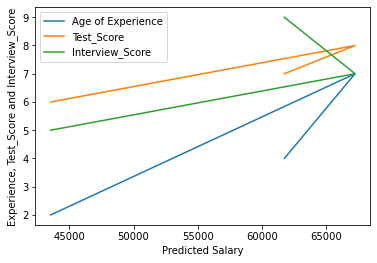

In [132]:
plt.xlabel("Predicted Salary")
plt.ylabel("Experience, Test_Score and Interview_Score")
plt.plot(P_df.Predicted_Salary,P_df.experience,label='Age of Experience')
plt.plot(P_df.Predicted_Salary,P_df['test_score(out of 10)'],label='Test_Score')
plt.plot(P_df.Predicted_Salary,P_df['interview_score(out of 10)'],label='Interview_Score')
plt.legend()



In [ ]:
P_df.Head
P_df.to_csv("Predicted_Salary")